# 07/09/2021 MEF ÜNİVERSİTESİ YETKİN GENÇLER VERİ BİLİMİ DERSİ

## Derse Giriş Soruları

* **Anormal ve Normal kavramları sizler için ne anlama geliyor?** 
* **Anormal durumların hayatınıza zarar verebileceği örnekler verebilir misiniz?** 
* **Yapay zeka anormal durumalrı tespit edebilmek için kullanılabilir mi?**



> Örnek Bir Anormal Durum
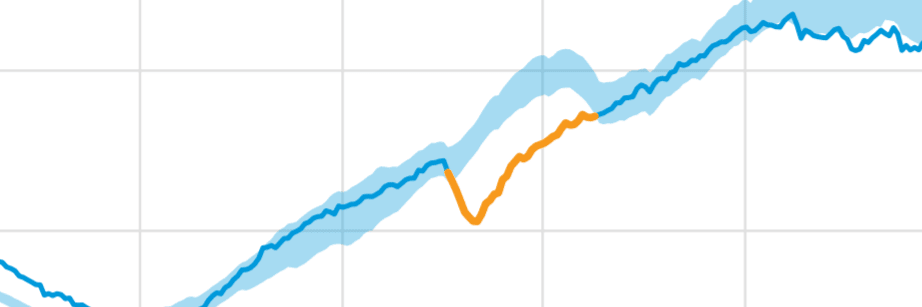



**Bu linke tıklayarak sırayla adımları yapınız.**

https://drive.google.com/drive/folders/16ZWI4fmcMbogrBGazJQttL4pB7vvo2cS?usp=sharing 

1. Linke tıklayınız
2. Google hesabınızla gmailinize giriş yapınız
3. "Benimle paylaşınlanlar > MEF_Anomaly_Detection" daki MEF_Anomaly_Detection'a sağ tıklayarak gmailinizde "Drive'ım" ya da ingilizce kullanıyorsanız "My Drive" a kısayol olarak ekleyiniz.

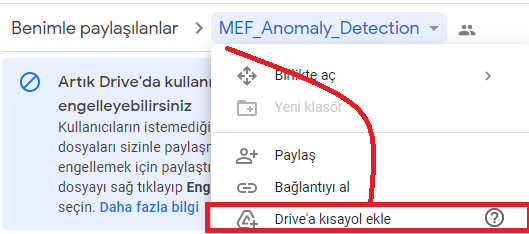

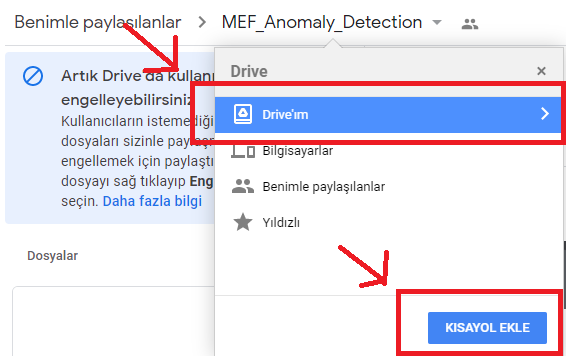

4. "Drive'ım" ya da "My Drive" klasörünü açınız.
5. Sizlerle paylaşılan MEF_Anomaly_Detection dosyasını açarak "Anomaly Detection.ipynb" dosyasına tıklayınız.
6. ***Tebrikler çalışma ortamını kurdunuz. Şimdi çalışmanıza başlayabilirsiniz.*** 

`NOT : 4 ve 5. adımları uygulamak yerine github yoluyla açtığınız .ipynb dosyası ile de işlemlerinize devam edebilirsiniz`


## Ders Kapsamında Öğrenceklerimiz


1.   Anormal/Normal nedir?
2.   Bir bilgisayar Anormal/Normal durumları nasıl anlar?
3.   Hangi algoritmalarla bunları çözebiliriz?
4.   Catboost, Isolation Forest nedir?




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q scikit-plot
!pip install catboost

     |████████████████████████████████| 67.4 MB 25 kB/s 


In [ ]:
import os

import scikitplot as skplt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

In [ ]:
kdd = pd.read_csv('/content/drive/MyDrive/MEF_Anomaly_Detection/kdd.csv')

In [ ]:
kdd.head(3)

,Unnamed: 0,Duration,Protocol Type,Service,Flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type_Groups
0,1,-0.150103,tcp,http,SF,-0.004917,0.019931,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.336229,-1.990255,0.536542,-0.34644,-0.154032,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal
1,2,-0.150103,tcp,http,SF,-0.004890,-0.048616,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.240464,-1.882796,0.536542,-0.34644,-0.346801,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal
2,3,-0.150103,tcp,http,SF,-0.004892,-0.036865,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.144700,-1.775337,0.536542,-0.34644,-0.411057,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal


In [ ]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183737 entries, 0 to 183736
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   183737 non-null  int64  
 1   Duration                     183737 non-null  float64
 2   Protocol Type                183737 non-null  object 
 3   Service                      183737 non-null  object 
 4   Flag                         183737 non-null  object 
 5   src_bytes                    183737 non-null  float64
 6   dst_bytes                    183737 non-null  float64
 7   land                         183737 non-null  int64  
 8   wrong_fragment               183737 non-null  int64  
 9   urgent                       183737 non-null  float64
 10  hot                          183737 non-null  float64
 11  num_failed                   183737 non-null  float64
 12  logged_in                    183737 non-null  float64
 13 

In [ ]:
kdd = kdd.iloc[:,1:43]
kdd = kdd.drop(['Protocol Type', 'Service', 'Flag'], axis = 1)

Normal    157871
R2L        17471
Probe       8273
U2R          122
Name: Type_Groups, dtype: int64


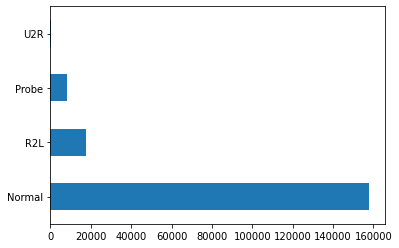

In [ ]:
print(kdd.Type_Groups.value_counts())
kdd['Type_Groups'].value_counts().plot(kind='barh')

In [ ]:
kdd_train = kdd.iloc[0:102563, :]
kdd_test = kdd.iloc[102563:183737, :]

In [ ]:
kdd_train_probe = kdd_train[(kdd_train.Type_Groups == 'Normal') | (kdd_train.Type_Groups == 'Probe')]
kdd_test_probe  = kdd_test[ (kdd_test.Type_Groups == 'Normal')  | (kdd_test.Type_Groups == 'Probe') ]

kdd_train_probe['Type_Groups'] = np.where(kdd_train_probe['Type_Groups'] == 'Normal', 1, -1)
kdd_test_probe['Type_Groups']  = np.where(kdd_test_probe['Type_Groups'] == 'Normal', 1, -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


 1    97278
-1     4107
Name: Type_Groups, dtype: int64


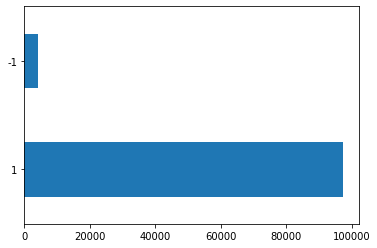

In [ ]:
print(kdd_train_probe.Type_Groups.value_counts())
kdd_train_probe['Type_Groups'].value_counts().plot(kind='barh')

 1    60593
-1     4166
Name: Type_Groups, dtype: int64


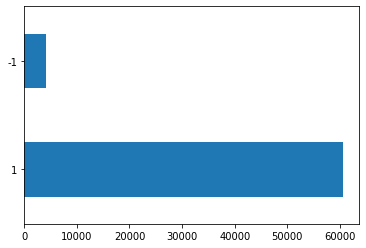

In [ ]:
print(kdd_test_probe.Type_Groups.value_counts())
kdd_test_probe['Type_Groups'].value_counts().plot(kind='barh')

In [ ]:
x_train = kdd_train_probe.drop(['Type_Groups'], axis = 1)
y_train = kdd_train_probe['Type_Groups']

x_test = kdd_test_probe.drop(['Type_Groups'], axis = 1)
y_test = kdd_test_probe['Type_Groups']

# 1.1 Isolation Forest

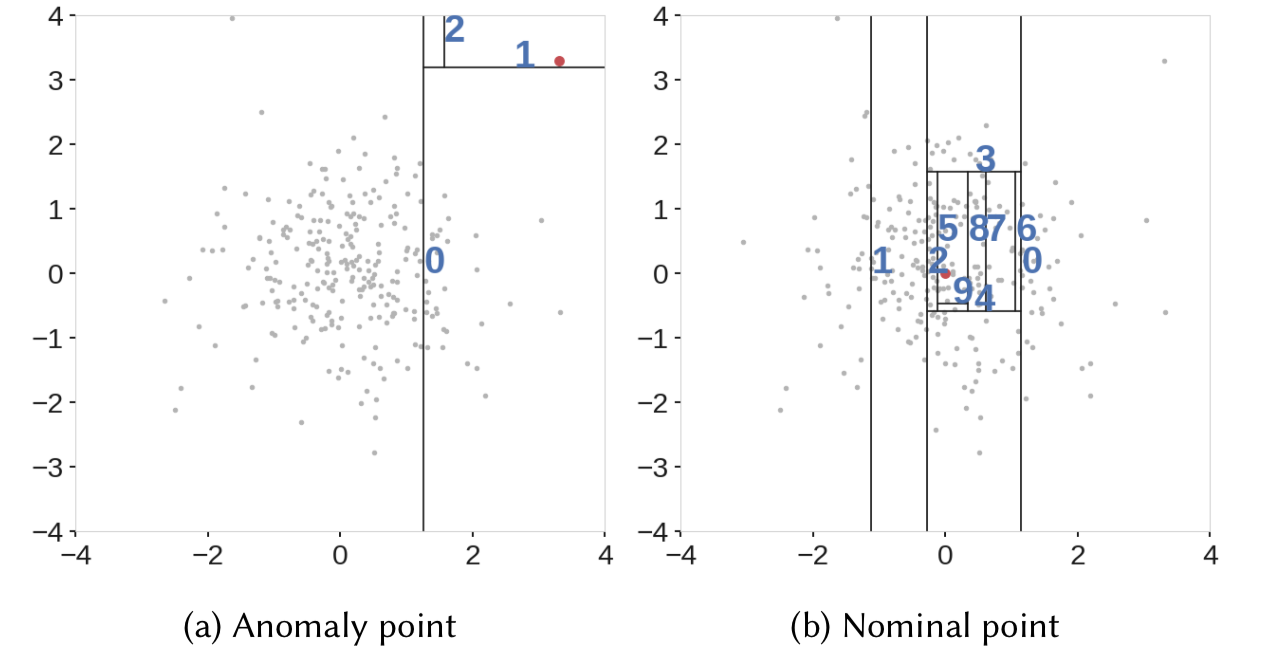

In [ ]:
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.15, n_estimators=100, n_jobs=-1)

In [ ]:
clfIF.fit(x_train, y_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples=0.25, n_estimators=100, n_jobs=-1,
                random_state=11, verbose=0, warm_start=False)

In [ ]:
y_pred_train = clfIF.predict(x_train)

In [ ]:
np.unique(y_pred_train)

array([-1,  1])

In [ ]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix

array([[ 3996,   111],
       [11212, 86066]])

In [ ]:
y_pred_test = clfIF.predict(x_test)
conf_matrix_if_test = confusion_matrix(y_test,y_pred_test )

In [ ]:
conf_matrix_if_test

array([[ 4163,     3],
       [ 8200, 52393]])

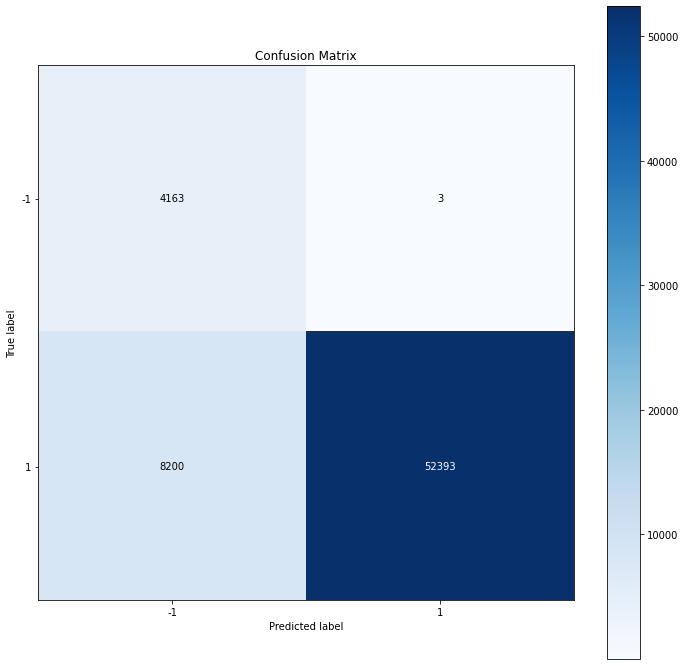

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(12,12))

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.34      1.00      0.50      4166
           1       1.00      0.86      0.93     60593

    accuracy                           0.87     64759
   macro avg       0.67      0.93      0.72     64759
weighted avg       0.96      0.87      0.90     64759



# 1.2 Catboost

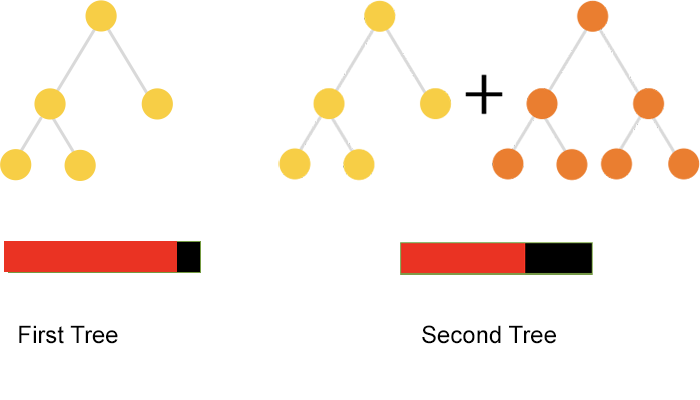

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=50 ,eval_metric='Accuracy',random_seed=42, verbose=True)
model.fit(x_train,y_train,eval_set=(x_test,y_test))

Learning rate set to 0.365033
0:	learn: 0.9945455	test: 0.9880171	best: 0.9880171 (0)	total: 96.7ms	remaining: 4.74s
1:	learn: 0.9973369	test: 0.9818095	best: 0.9880171 (0)	total: 142ms	remaining: 3.42s
2:	learn: 0.9989939	test: 0.9570562	best: 0.9880171 (0)	total: 189ms	remaining: 2.95s
3:	learn: 0.9992109	test: 0.9640668	best: 0.9880171 (0)	total: 232ms	remaining: 2.67s
4:	learn: 0.9993293	test: 0.9652095	best: 0.9880171 (0)	total: 274ms	remaining: 2.46s
5:	learn: 0.9993786	test: 0.9567319	best: 0.9880171 (0)	total: 314ms	remaining: 2.3s
6:	learn: 0.9993786	test: 0.9567319	best: 0.9880171 (0)	total: 348ms	remaining: 2.14s
7:	learn: 0.9994082	test: 0.9552958	best: 0.9880171 (0)	total: 385ms	remaining: 2.02s
8:	learn: 0.9994082	test: 0.9552958	best: 0.9880171 (0)	total: 429ms	remaining: 1.95s
9:	learn: 0.9994082	test: 0.9552958	best: 0.9880171 (0)	total: 465ms	remaining: 1.86s
10:	learn: 0.9994082	test: 0.9552958	best: 0.9880171 (0)	total: 499ms	remaining: 1.77s
11:	learn: 0.9994181	te

In [ ]:
print("Start Predicting")
predictions = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:, 1]

print("\nResulting Metrics")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
print("AUC : %f" % metrics.roc_auc_score(y_test, pred_proba))
print("F1 Score : %f" % metrics.f1_score(y_test, predictions))



Start Predicting

Resulting Metrics
Accuracy : 0.988
AUC : 0.982138
F1 Score : 0.993613


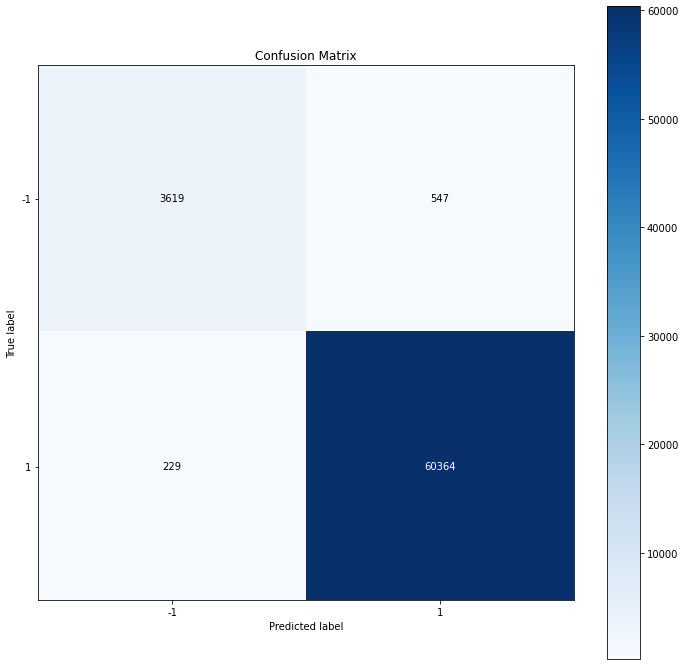

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,predictions,figsize=(12,12))

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.94      0.87      0.90      4166
           1       0.99      1.00      0.99     60593

    accuracy                           0.99     64759
   macro avg       0.97      0.93      0.95     64759
weighted avg       0.99      0.99      0.99     64759



# Bitiş Sorusu !!!!
* Farklı sektör gruplarını düşünüz. Hangi sektörde hangi algoritmayı kullanmak sizce mantıklı olur? (Tartışalım)